<a href="https://colab.research.google.com/github/atefehhaji/HW/blob/master/Atefeh_ML_%E2%85%AFiniProje%E2%85%BDt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier




**Load MNIST Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['mnist_test.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving mnist_test.csv to mnist_test.csv


In [ ]:
type(df)

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))
# Dataset is now stored in a Pandas Dataframe


In [8]:
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


9

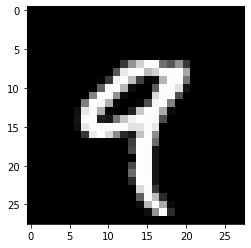

In [30]:
df_array_train = df_train.to_numpy()
X_train_original = df_array_train[:,1:]
plt.imshow(X_train_original[4].reshape(28,28), cmap='gray')
Y_train_original = df_array_train[:,0]
Y_train_original[4]

255

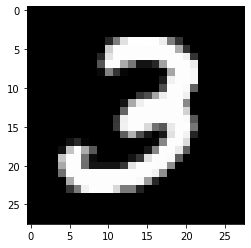

In [60]:

df_array_train_prm = df_array_train[np.random.RandomState(seed=42).permutation(df_array_train.shape[0])]
X_train = df_array_train_prm[:,1:]
Y_train = df_array_train_prm[:,0]
df_array_train_prm.shape
plt.imshow(X_train[4].reshape(28,28), cmap='gray')
#print('X4 =',  X_train[4],)
np.max(X_train)
#Y_train[4]

**Normalize Data**

In [61]:
X_train = X_train/255

**Split the Dataset into Train and Validation**

In [133]:
X_train_train = X_train[ :4800,:]
Y_train_train = Y_train[: 4800]

X_train_validation = X_train[4800:6000,: ]
Y_train_validation = Y_train[4800:6000]

In [128]:
X_train_train.shape

(4800, 784)

In [129]:
Y_train_train.shape

(4800,)

In [130]:
X_train_validation.shape

(1200, 784)

In [134]:
Y_train_validation.shape

(1200,)

# Test Set

In [159]:
df_array_test = df.to_numpy()
X_test = df_array_test[:,1:]
Y_test = df_array_test[:,0]
X_test = X_test/255
print(X_test.shape)
print(Y_test.shape)

(10000, 784)
(10000,)


# **LogisticRegression**


Resize the Dataset

In [100]:
# size=14
# X_train_train_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_train]
# X_train_validation_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_validation]
    
 
# X_train_train_re = [x.reshape(size*size) for x in X_train_train_re]
# X_train_validation_re = [x.reshape(size*size) for x in X_train_validation_re]

In [105]:
clf = LogisticRegression(random_state=42, max_iter=700, verbose=1, multi_class='ovr', n_jobs=-1)
clf.fit(X_train_train, Y_train_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [107]:
clf.score(X_train_train, Y_train_train)

0.9670833333333333

# **KNN**

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_train, Y_train_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [111]:
knn.score(X_train_train, Y_train_train)

0.9704166666666667

In [151]:
score_train = []
num_neighbors =[]
for k in range(1,20,1):
  my_knn = KNeighborsClassifier(n_neighbors=k)
  my_knn.fit(X_train_train, Y_train_train)
  num_neighbors.append(k)
  score_train.append(my_knn.score(X_train_validation, Y_train_validation))

In [152]:
np.max(score_train)

0.9483333333333334

In [162]:
num_neighbors_opt = num_neighbors[np.argmax(score_train)]
num_neighbors_opt

1

In [154]:
#score_train
print('Optimum Numbers of Neighbors = ', num_neighbors[np.argmax(score_train)])
print('Optimum Score = ', np.max(score_train))

Optimum Numbers of Neighbors =  1
Optimum Score =  0.9483333333333334


In [164]:
my_knn_opt = KNeighborsClassifier(n_neighbors=num_neighbors_opt)
my_knn_opt.fit(X_train_train, Y_train_train)

my_knn_opt.score(X_test,Y_test)

0.9346

# **Perceptron**

In [166]:
perceptron = Perceptron(verbose=0)

In [167]:
perceptron.fit(X_train_train, Y_train_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
perceptron.score(X_train_train, Y_train_train)

0.9475

In [175]:
score_train_perceptron = []
alpha_set = [0.00001, 0.0001, 0.001, 0.01, 0.01]
for k in alpha_set:
  perceptron = Perceptron(verbose=0, alpha=k)
  perceptron.fit(X_train_train, Y_train_train)
  score_train_perceptron.append(perceptron.score(X_train_validation, Y_train_validation))

In [176]:
score_train_perceptron

[0.8766666666666667,
 0.8766666666666667,
 0.8766666666666667,
 0.8766666666666667,
 0.8766666666666667]

In [171]:
#score_train
print('Optimum alpha = ', alpha_set[np.argmax(score_train_perceptron)])
print('Optimum Score for Perceptron = ', np.max(score_train_perceptron))

Optimum alpha =  1e-05
Optimum Score for Perceptron =  0.8766666666666667


In [177]:
perceptron.fit(X_train_train, Y_train_train)

perceptron.score(X_test,Y_test)

0.8695

# **MLP**

In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50,), max_iter=1000)

In [118]:
mlp.fit(X_train_train, Y_train_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [119]:
mlp.score(X_train_train, Y_train_train)

1.0

Hidden Layer Size

In [178]:
score_train_MLP = []
hidden_layer_size_set =[]
for k in range(5,50,5):
  mlp = MLPClassifier(hidden_layer_sizes=k, max_iter=1000) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  hidden_layer_size_set.append(k)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [179]:
print('Optimum Layer Size = ', hidden_layer_size_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

Optimum alpha =  45
Optimum Score for Perceptron =  0.9333333333333333


In [183]:
mlp_opt_layer_size = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 

mlp_opt_layer_size.fit(X_train_train, Y_train_train)

mlp_opt_layer_size.score(X_test,Y_test)

0.9233

Iteration


In [186]:
score_train_MLP = []
Iteration_set =[]
for k in range(500,2000,250):
  mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=k) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  Iteration_set.append(k)

In [187]:
print('Optimum Iteration = ', Iteration_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

Optimum Iteration =  1000
Optimum Score for MLP =  0.9383333333333334


Activation

In [190]:
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
param_grid = dict(activation =activations)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=45,
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [192]:
print(grid.best_score_)
print(grid.best_estimator_.activation)

0.9252083333333333
relu


Solver


In [193]:
solvers = np.array(['lbfgs', 'sgd', 'adam'])
param_grid = dict(solver =solvers)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=45,
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.solver)

# **SVM**

In [196]:
svm = SVC(C=1.0, kernel='linear', probability=True)
svm.fit(X_train_train, Y_train_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [204]:
score_train_SVM = []
kernel_set =np.array(['linear', 'poly', 'rbf', 'sigmoid'])

for k in kernel_set:
  print(k)
  svm = SVC(C=1.0, kernel=k, probability=True)
  svm.fit(X_train_train, Y_train_train)
  score_train_SVM.append(svm.score(X_train_validation, Y_train_validation))
 

linear
poly
rbf
sigmoid


In [205]:
print('Optimum Kernel = ', kernel_set[np.argmax(score_train_SVM)])
print('Optimum Score for MLP = ', np.max(score_train_SVM))

Optimum Kernel =  rbf
Optimum Score for MLP =  0.9641666666666666


In [206]:
  svm = SVC(C=1.0, kernel='rbf', probability=True)


In [207]:
svm.fit(X_train_train, Y_train_train)

svm.score(X_test,Y_test)

0.9542

# **DT**

In [3]:
score_train_dt = []
num_trees =[]
num_max_sample = []
for k in range(20,100,10):
  for s in range(50,300,50):
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=k,  max_samples=s, n_jobs=-1)
    clf.fit(X_train_train, Y_train_train)
    score_train_dt.append(clf.score(X_train_validation, Y_train_validation))
    num_trees.append(k)
    num_max_sample.append(s)
print('Optimum number of trees = {}  and Optimum number of max_sample ={}' .format(num_trees[np.argmax(score_train_dt)], num_max_sample[np.argmax(score_train_dt)]))
print('Optimum Score for DT = ', np.max(score_train_dt))

NameError: ignored